# 获得前N个主成分

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(666)
X = np.empty(shape = (100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

In [3]:
def demean(x):
    return x - np.mean(x)

X = demean(X)

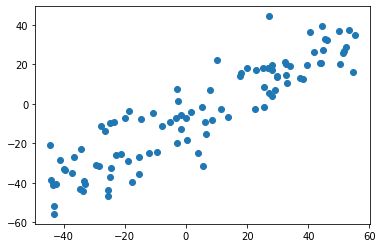

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
def f(x, w):
    return np.sum(x.dot(w) ** 2) / len(x)

def delta_f(x, w):
    return x.T.dot(x.dot(w)) * 2. / len(x)

def direction(w):
    return w / np.linalg.norm(w)  # 求单位向量

def gradient_ascent(x, w, iter_times, learn_rate):
    w = direction(w)
    loss_his = []
    while iter_times:
        gradient = delta_f(x, w)
        w += learn_rate * gradient
        w = direction(w)  # 注意一：将w转化为单位向量，简化计算
        loss_his.append(f(x, w))
        iter_times -= 1
    return w, loss_his

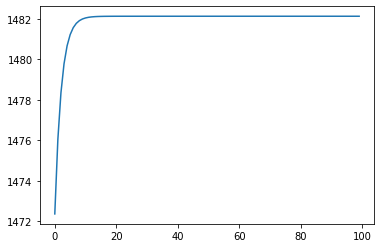

array([0.77852666, 0.62761153])

In [6]:
w_init = np.ones(shape=X.shape[1])
iter_times = 100
learn_rate = 0.0001

first_w, first_loss = gradient_ascent(X, w_init, iter_times, learn_rate)

plt.plot(first_loss)
plt.show()

first_w

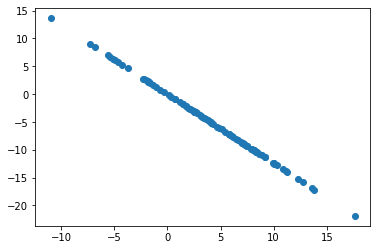

In [7]:
X2 = X - X.dot(first_w).reshape(-1,1) * first_w
plt.scatter(X2[0:, 0], X2[0:, 1])
plt.show()

# 获得前n个主成分函数

In [8]:
def first_n_components(n, x, eta, iters_n):
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = []
    
    for i in range(n):
        init_w = np.ones(shape=x_pca.shape[1])
        w, loss = gradient_ascent(x_pca, init_w, iters_n, eta)
        res.append(w)
        
        x_pca -= x_pca.dot(w).reshape(-1,1) * w
    
    return res

In [9]:
res = first_n_components(2, X, 0.001, 100)
res

[array([0.77852666, 0.62761153]), array([-0.62761151,  0.77852668])]

In [10]:
new = np.empty(shape=(100,2)) 
new[:, 0] = X.dot(res[0])
new[:, 1] = X.dot(res[1])

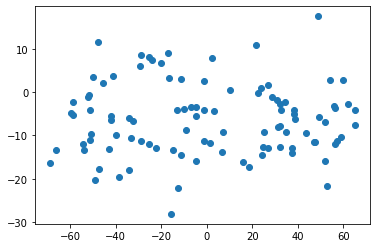

In [11]:
plt.scatter(new[:, 0], new[:, 1])
plt.show()